<a href="https://colab.research.google.com/github/Pooooj/LRM/blob/main/MedicalInsure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# read the data
data = pd.read_csv('/content/drive/MyDrive/MedicalInsure/insurance.csv')

In [ ]:
#shape of the data
data.shape

(1338, 7)

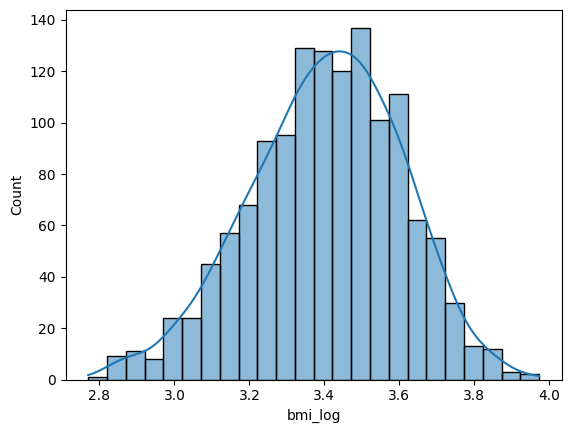

In [ ]:
#distribution of bmi look like after applying the log transformation on it
data['bmi_log'] = np.log(data.bmi)
sns.histplot(data=data, x='bmi_log', kde=True)
plt.show()

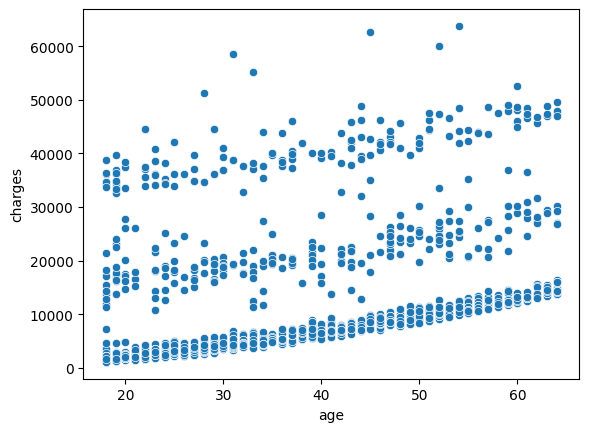

0.29900819333064754


In [ ]:
#correlation between Age and charges
sns.scatterplot(data=data, x='age', y='charges')
plt.show()
correlation = data['age'].corr(data['charges'])
print(correlation)

In [ ]:
#To find which region is dropped by using the categorical columns
data = pd.get_dummies(data, columns=['sex','smoker','region'], drop_first=True)
data.head()

,age,bmi,children,charges,bmi_log,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,3.328627,False,True,False,False,True
1,18,33.770,1,1725.55230,3.519573,True,False,False,True,False
2,28,33.000,3,4449.46200,3.496508,True,False,False,True,False
3,33,22.705,0,21984.47061,3.122585,True,False,True,False,False
4,32,28.880,0,3866.85520,3.363149,True,False,True,False,False


So North east region is dropped

In [ ]:
#Number of rows in test data after droppng BMI_LOG
!pip install statsmodels
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X = data.drop(['charges', 'bmi_log'],axis=1)
X = sm.add_constant(X)
y = data['charges']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

x_test.shape
print(f"Number of rows in the test set: {x_test.shape[0]}")

Number of rows in the test set: 402


In [ ]:
#Build a linear regression model using the train set.
from sklearn.linear_model import LinearRegression

# Create and fit the linear regression model
lr_sklearn = LinearRegression()
lr_sklearn.fit(x_train, y_train)

# Print the model intercept
print("Intercept:", lr_sklearn.intercept_)



Intercept: -11039.238418561557


In [ ]:
#true regarding the R-squared of the model on the train dataset
lr_sklearn.score(x_train, y_train)

0.7545557492633161

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

from sklearn import linear_model



poly = PolynomialFeatures(degree=2, interaction_only=True)

X_train2 = poly.fit_transform(x_train)

X_test2 = poly.fit_transform(x_test)



poly_clf = linear_model.LinearRegression()



poly_clf.fit(X_train2, y_train)



#In sample (training) R^2 will always improve with the number of variables!

print(poly_clf.score(X_train2, y_train))




0.8431504621486455


In [ ]:
from sklearn.metrics import mean_absolute_error
#predicting on the test set
y_pred = lr_sklearn.predict(x_test)

#calculating MAE
mean_absolute_error(y_test, y_pred)

4139.932064766016

Every time your model predicts a value (like the medical charges for a person), the prediction is, on average, $4139.93 away from the actual, true value.

In [ ]:
#Out off sample (testing) R^2
print(poly_clf.score(X_test2, y_test))



0.838700214558127


achieving an R-squared of 0.8387 on the test set with polynomial features is a positive outcome. successfully improved model's ability to capture complex relationships and make more accurate predictions on new data.